In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm, time
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
plt.style.use('bmh'); sns.set()

"Done"

'Done'

In [ ]:
try: # Try Local Load
    train = pd.read_csv('data/KompStat-HPDS-case-train.csv')
    test = pd.read_csv('data/KompStat-HPDS-case-test.csv')
except: # Download data from taudata GitHub (dijalankan di Google Colab)
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/KompStat-HPDS-case-train.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/KompStat-HPDS-case-test.csv
    # Anda juga bisa unduh data dengan menggunakan URL diatas.
    train = pd.read_csv('data/KompStat-HPDS-case-train.csv')
    test = pd.read_csv('data/KompStat-HPDS-case-test.csv')
print(train.shape, test.shape)
print(train.info())
train.head()

mkdir: cannot create directory ‘data’: File exists
--2023-11-23 00:46:34--  https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/KompStat-HPDS-case-train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9793 (9.6K) [text/plain]
Saving to: ‘data/KompStat-HPDS-case-train.csv’

KompStat-HPDS-case- 100%[===================>]   9.56K  --.-KB/s    in 0s      

2023-11-23 00:46:34 (61.7 MB/s) - ‘data/KompStat-HPDS-case-train.csv’ saved [9793/9793]

--2023-11-23 00:46:35--  https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/KompStat-HPDS-case-test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com

,x1,x2,y
0,-0.835291,3.576690,0
1,1.323524,4.229088,0
2,-1.373580,2.729440,3
3,0.852342,2.603071,0
4,3.321460,2.198889,0


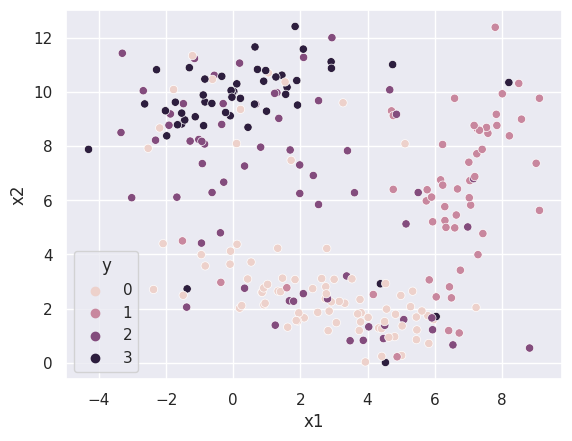

In [ ]:
p = sns.scatterplot(x=train.x1, y=train.x2, hue = train.y)

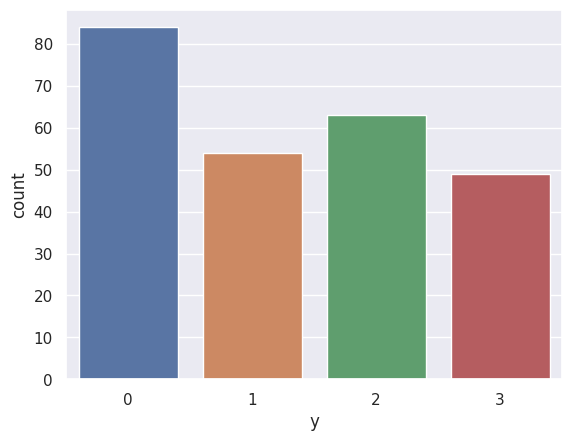

In [ ]:
p= sns.countplot(x=train.y)

In [ ]:
def getNeighbour(data, observasi, k):
    data['distance'] = 0.0
    for idx, dt in data.iterrows():
        data.at[idx, 'distance'] = distance.minkowski(dt[['x1','x2']], observasi[['x1','x2']], 2)
    data.sort_values(by=['distance'], inplace=True, ascending=True)
    data = data.head(k)
    return data

In [ ]:
# Serial Code
k = 5
cross_validasi = 10
hasil = {'waktu':[], 'label':[]}
akurasi = []
for cv in range(cross_validasi):
    mulai = time.time()
    prediksi = []
    for i, d in test.iterrows():tma
        tetangga = getNeighbour(train, d, k)
        prediksi.append(tetangga.y.mode().values[0])
    waktu = time.time() - mulai
    akurasi.append(accuracy_score(test.y.tolist(), prediksi))
    hasil['waktu'].append(waktu)
    hasil['label'].append('serial')

print("Rata-rata akurasi = {}, Variansi Akurasi = {}".format(np.mean(akurasi), np.var(akurasi)), flush=True)
# Catatan: karena "test data" tidak berubah di setiap iterasi, maka akurasi tidak perlu masuk ke variabel "hasil"
hasil = pd.DataFrame(hasil)
hasil.head()

Rata-rata akurasi = 0.716, Variansi Akurasi = 0.0


,waktu,label
0,80.973394,serial
1,75.758266,serial
2,71.749335,serial
3,70.932181,serial
4,72.260639,serial


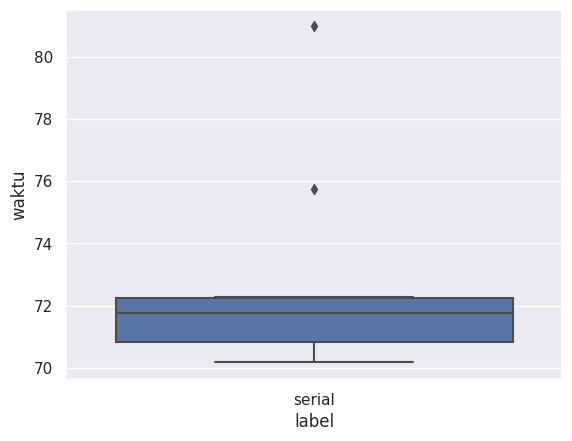

In [ ]:
p = sns.boxplot(y="waktu", x="label", data=hasil)

#Kasus 1
Bandingkan performa model dengan 3 rumus jarak lainnya: [Manhattan, Chebysev, dan Canberra]

##Manhattan

In [ ]:
def getNeighbourManhattan(data, observasi, k):
    data['distance'] = 0.0
    for idx, dt in data.iterrows():
        data.at[idx, 'distance'] = distance.minkowski(dt[['x1','x2']], observasi[['x1','x2']], 1)
    data.sort_values(by=['distance'], inplace=True, ascending=True)
    data = data.head(k)
    return data

KeyboardInterrupt: ignored

In [ ]:
# Serial Code
k = 5
cross_validasi = 10
hasil = {'waktu':[], 'label':[]}
akurasi = []
for cv in range(cross_validasi):
    mulai = time.time()
    prediksi = []
    for i, d in test.iterrows():
        tetangga = getNeighbourManhattan(train, d, k)
        prediksi.append(tetangga.y.mode().values[0])
    waktu = time.time() - mulai
    akurasi.append(accuracy_score(test.y.tolist(), prediksi))
    hasil['waktu'].append(waktu)
    hasil['label'].append('serial')

print("Rata-rata akurasi Manhattan = {}, Variansi Akurasi Manhattan = {}".format(np.mean(akurasi), np.var(akurasi)), flush=True)
hasil = pd.DataFrame(hasil)
hasil.head()

In [ ]:
avgtime = hasil['waktu'].mean()
print("Rata-rata waktu running Manhattan = {} ".format(avgtime))

In [ ]:
p = sns.boxplot(y="waktu", x="label", data=hasil)

##Chebysev

In [ ]:
def getNeighbourChebyshev(data, observasi, k):
    data['distance'] = 0.0
    for idx, dt in data.iterrows():
        data.at[idx, 'distance'] = distance.chebyshev(dt[['x1','x2']], observasi[['x1','x2']])
    data.sort_values(by=['distance'], inplace=True, ascending=True)
    data = data.head(k)
    return data
# Serial Code
k = 5
cross_validasi = 10
hasil = {'waktu':[], 'label':[]}
akurasi = []
for cv in range(cross_validasi):
    mulai = time.time()
    prediksi = []
    for i, d in test.iterrows():
        tetangga = getNeighbourChebyshev(train, d, k)
        prediksi.append(tetangga.y.mode().values[0])
    waktu = time.time() - mulai
    akurasi.append(accuracy_score(test.y.tolist(), prediksi))
    hasil['waktu'].append(waktu)
    hasil['label'].append('serial')

print("Rata-rata akurasi Chebyshev = {}, Variansi Akurasi Chebyshev = {}".format(np.mean(akurasi), np.var(akurasi)), flush=True)
hasil = pd.DataFrame(hasil)
hasil.head()

In [ ]:
avgtime = hasil['waktu'].mean()
print("Rata-rata waktu running Chebyshev = {} ".format(avgtime))

In [ ]:
p = sns.boxplot(y="waktu", x="label", data=hasil)

##Canberra

In [ ]:
def getNeighbourCanberra(data, observasi, k):
    data['distance'] = 0.0
    for idx, dt in data.iterrows():
        data.at[idx, 'distance'] = distance.canberra(dt[['x1','x2']], observasi[['x1','x2']])
    data.sort_values(by=['distance'], inplace=True, ascending=True)
    data = data.head(k)
    return data
# Serial Code
k = 5
cross_validasi = 10
hasil = {'waktu':[], 'label':[]}
akurasi = []
for cv in range(cross_validasi):
    mulai = time.time()
    prediksi = []
    for i, d in test.iterrows():
        tetangga = getNeighbourCanberra(train, d, k)
        prediksi.append(tetangga.y.mode().values[0])
    waktu = time.time() - mulai
    akurasi.append(accuracy_score(test.y.tolist(), prediksi))
    hasil['waktu'].append(waktu)
    hasil['label'].append('serial')

print("Rata-rata akurasi Canberra = {}, Variansi Akurasi Canberra = {}".format(np.mean(akurasi), np.var(akurasi)), flush=True)
hasil = pd.DataFrame(hasil)
hasil.head()

In [ ]:
avgtime = hasil['waktu'].mean()
print("Rata-rata waktu running Canberra = {} ".format(avgtime))

In [ ]:
p = sns.boxplot(y="waktu", x="label", data=hasil)